<h1 style='font-size:40px'> <center> Coronavirus Pandemic (COVID-19) </center></h1>

<h1><center>  World Corona Analysis & Live Tracker  </center></h1> 

### Import Classes

In [51]:
import pandas as pd
import numpy as np
import matplotlib as mtp
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

### Loading Coronavirus Source Data ( https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv)

In [52]:
#data = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")
#data.to_csv("owid-covid-data.csv")
data = pd.read_csv("owid-covid-data.csv",index_col=[0])

### Visualize header Data

In [53]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


### Total Record By Continent

In [54]:
data.groupby('continent').size()

continent
Africa           13142
Asia             13107
Europe           14375
North America     8792
Oceania           2129
South America     3287
dtype: int64

### Select the column Requied

In [55]:
features = ['date','total_cases','new_cases','total_deaths','new_deaths','positive_rate']

### Country = 'INDIA' 

In [56]:
india = data.loc[data['location']=='India']

Loading Data   [ total_cases,new_cases, total_deaths, new_deaths]

In [57]:
basic_data = india[features]
basic_data.head()

,date,total_cases,new_cases,total_deaths,new_deaths,positive_rate
23197,2019-12-31,NaN,0.0,NaN,0.0,NaN
23198,2020-01-01,NaN,0.0,NaN,0.0,NaN
23199,2020-01-02,NaN,0.0,NaN,0.0,NaN
23200,2020-01-03,NaN,0.0,NaN,0.0,NaN
23201,2020-01-04,NaN,0.0,NaN,0.0,NaN


In [73]:
#basic_data.isnull().sum()
basic_data = basic_data.fillna(0)

### Current Cases

In [63]:
import datetime as d
date = d.datetime.today() - d.timedelta(1)
previous = d.datetime.strftime(date,'%Y-%m-%d')
india.loc[data['date']==previous]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
23510,IND,Asia,India,2020-11-08,8507754.0,45674.0,46238.857,126121.0,559.0,572.857,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64


### Time Graph - [ Cases ]

<BarContainer object of 314 artists>

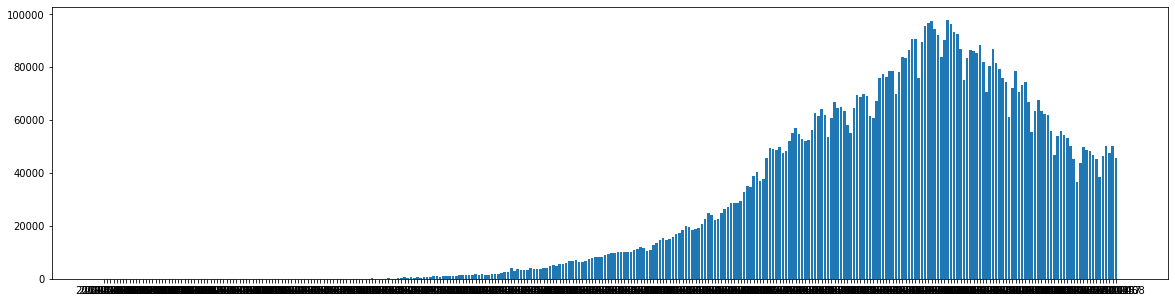

In [74]:
plt.figure(figsize=(20,5))
plt.bar(basic_data.date,basic_data.new_cases)

### Time Graph - [ Deaths ]

<BarContainer object of 314 artists>

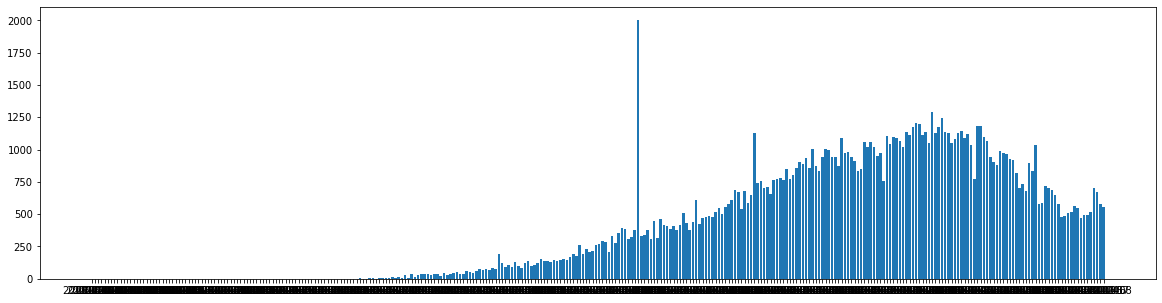

In [75]:
plt.figure(figsize=(20,5))
plt.bar(basic_data.date,basic_data.new_deaths)

#### Re-Index with Dates 

In [76]:
row_dates = basic_data.set_index(['date'])

#### In Bewteen - [ Date]

<BarContainer object of 122 artists>

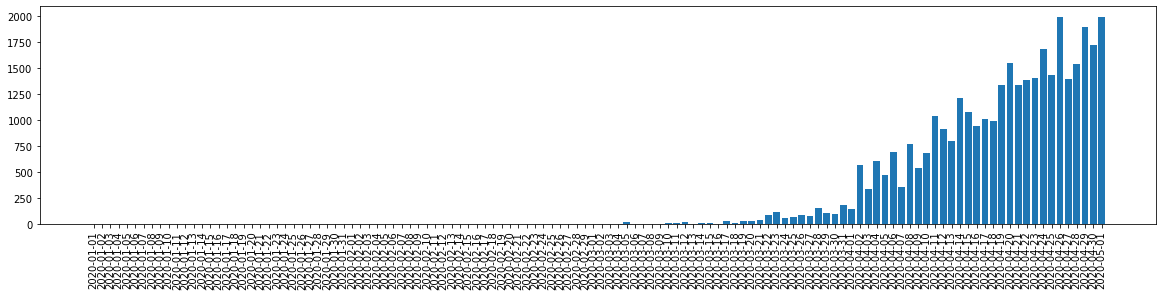

In [78]:
# Check the Data Between Dates
#row_dates.loc['2020-01-01':'2020-03-01'].head()
daily_new_cases = row_dates.loc['2020-01-01':'2020-05-01']

plt.figure(figsize=(20,4))
plt.xticks(rotation=90)
plt.bar(daily_new_cases.index,daily_new_cases.new_cases)

####  Graph into Day, Weekly, Monthly

Change the dtypes row index: 'object'  -> 'datetime'

In [79]:
# define a new dataset to copy
into_datetime = row_dates.copy()
into_datetime.index = pd.to_datetime(into_datetime.index)

#### By Week- [ CASES ]

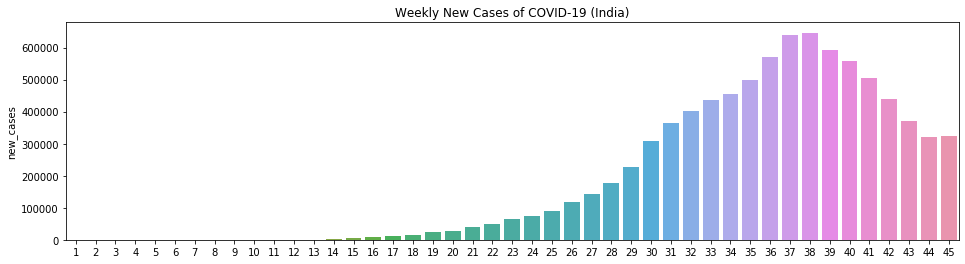

In [80]:
week_cases = into_datetime.new_cases.resample('W').sum()
week_graph = pd.Series(week_cases,index=week_cases.index)

## Plot the Grpah
plt.figure(figsize=(16,4))
plt.title("Weekly New Cases of COVID-19 (India)")
#plt.xticks(rotation=70)
x_label = [i+1 for i in range(len(week_graph.index))]
sns.barplot(x=x_label,y=week_graph)

#### Weekly - [ DEATHS ]

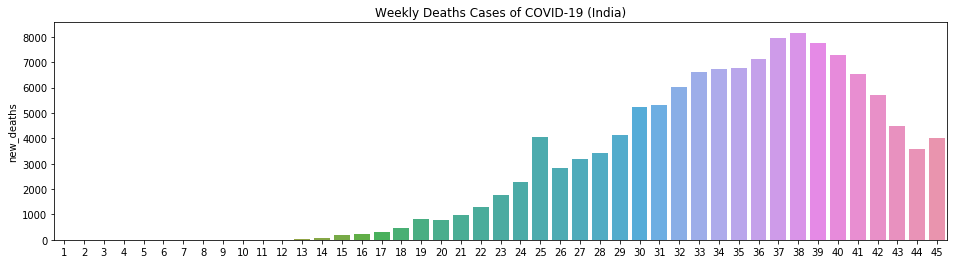

In [26]:

week_cases = into_datetime.new_deaths.resample('W').sum()
week_graph = pd.Series(week_cases,index=week_cases.index)

## Plot the Grpah
plt.figure(figsize=(16,4))
plt.title("Weekly Deaths Cases of COVID-19 (India)")
#plt.xticks(rotation=70)
x_label = [i+1 for i in range(len(week_graph.index))]
sns.barplot(x=x_label,y=week_graph)

###  Cases - [ by month ]

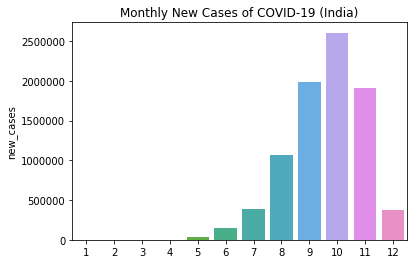

In [27]:
month_cases = into_datetime.new_cases.resample('M').sum()
month_graph = pd.Series(month_cases,index=month_cases.index)

## Plot the Grpah
#plt.figure(figsize=(16,4))
plt.title("Monthly New Cases of COVID-19 (India)")
#plt.xticks(rotation=70)
x_label = [i+1 for i in range(len(month_graph.index))]
sns.barplot(x=x_label,y=month_graph)

### Deaths- [ by month ]

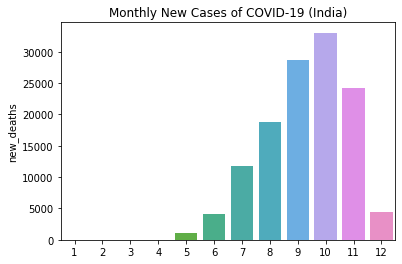

In [28]:
month_death = into_datetime.new_deaths.resample('M').sum()
month_death_graph = pd.Series(month_death,index=month_death.index)

## Plot the Grpah
#plt.figure(figsize=(16,4))
plt.title("Monthly New Cases of COVID-19 (India)")
#plt.xticks(rotation=70)
x_label = [i+1 for i in range(len(month_death_graph.index))]
sns.barplot(x=x_label,y=month_death_graph)

###### COVID CASES VS DEATH CASES

<BarContainer object of 314 artists>

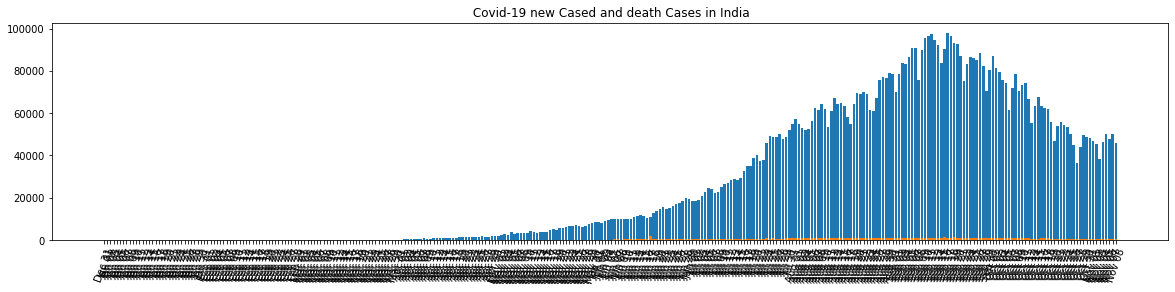

In [29]:
import datetime
plt.figure(figsize=(20,4))
plt.title(" Covid-19 new Cased and death Cases in India")
date_value = [i for i in india.date]
x_value = [datetime.datetime.strptime(x,'%Y-%m-%d').strftime("%b %d") for x in date_value]

plt.xticks(rotation=70)
plt.bar(x_value,india.new_cases)
plt.bar(x_value,india.new_deaths)

In [40]:
pd.DataFrame({'Cases':india.new_cases.tail(1),'Deaths':india.new_deaths.tail(1)})

,Cases,Deaths
23510,45674.0,559.0


In [84]:
dataset = data.copy()

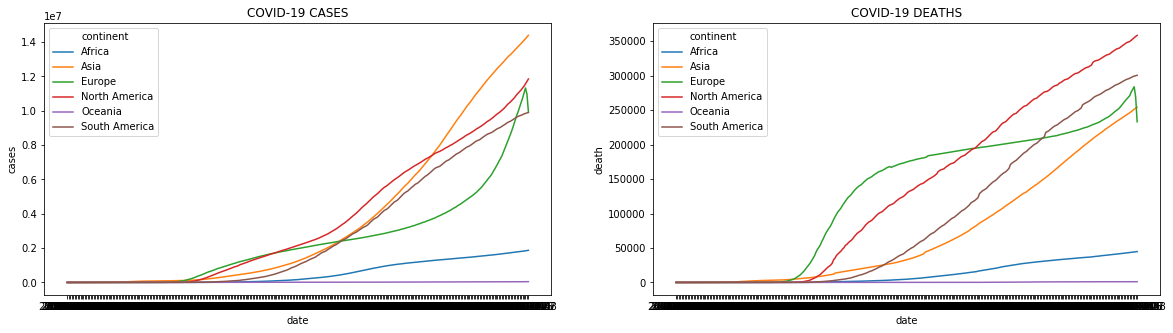

In [33]:
continents = dataset.groupby(['date','continent']).apply(lambda df:df.total_cases.sum()).to_frame().reset_index()
cont_case = continents.groupby(['date','continent']).apply(lambda df:df[0].sum()).to_frame().reset_index()
cont_case = cont_case.rename(columns={0:'cases'})
cont_case["cases"] = cont_case["cases"].astype(float).astype(int)

plt.figure(figsize=(20,5))

plt.subplot(1,2,1).set_title("COVID-19 CASES")
plt.xlabel('DAY')
plt.ylabel('CASES')

sns.lineplot(data=cont_case,x="date",y="cases",hue="continent")

continents = dataset.groupby(['date','continent']).apply(lambda df:df.total_deaths.sum()).to_frame().reset_index()
cont_death = continents.groupby(['date','continent']).apply(lambda df:df[0].sum()).to_frame().reset_index()
cont_death = cont_death.rename(columns={0:'death'})
cont_death["death"] = cont_death["death"].astype(float).astype(int)

plt.subplot(1,2,2).set_title("COVID-19 DEATHS")
plt.xlabel('DAY')
plt.ylabel('CASES')

sns.lineplot(data=cont_death,x="date",y="death",hue="continent")


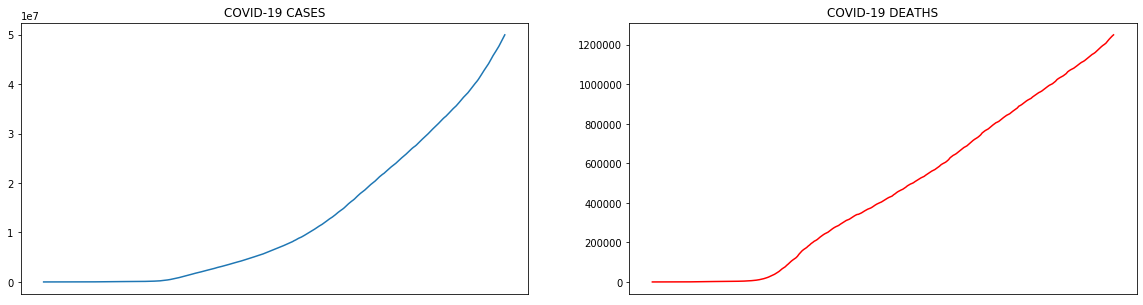

In [135]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1).set_title("COVID-19 CASES")
plt.xticks([])#np.arange(0, len(dataset[dataset['location']=='World']['total_deaths']), step=1))
plt.plot(dataset[dataset['location']=='World']['total_cases'])

plt.subplot(1,2,2).set_title("COVID-19 DEATHS")
plt.xticks([])#np.arange(0, len(dataset[dataset['location']=='World']['total_deaths']), step=1))
plt.plot(dataset[dataset['location']=='World']['total_deaths'],color='r')

In [174]:
table = dataset.groupby('location').tail(1)[['location','total_cases','total_deaths','new_cases','new_deaths','population']][:-2]

form = dict()
for x in table.columns:
    if table[x].dtypes =="float64":
        form[x]='{0:,.0f}'       
table.sort_values(by='total_cases',ascending=False).style.format(form)\
            .bar(subset=['total_cases'],color=['#5fba7d'])\
            .bar(subset=['total_deaths'],color=['#d65f5f'])\
            .hide_index()\
            .background_gradient(cmap="Blues",subset=["new_cases","new_deaths"])\
            .bar(subset=['population'],color=['#d65f5f'])\
            .set_table_styles([{'selector' : '','props' : [('font-size','9pt'),('border','1px solid black')]}])                

location,total_cases,total_deaths,new_cases,new_deaths,population
United States,"9,860,958","237,113","121,413","1,014","331,002,647"
India,"8,507,754","126,121","45,674",559,"1,380,004,385"
Brazil,"5,590,025","161,106",0,0,"212,559,409"
Russia,"1,753,836","30,251","20,396",364,"145,934,460"
France,"1,748,705","40,169","86,852",304,"65,273,512"
Spain,"1,328,832","38,833",0,0,"46,754,783"
Argentina,"1,236,838","33,348","8,037",212,"45,195,777"
United Kingdom,"1,171,441","48,888","24,957",413,"67,886,004"
Colombia,"1,136,447","32,595","8,714",190,"50,882,884"
Mexico,"961,938","94,808","6,810",485,"128,932,753"


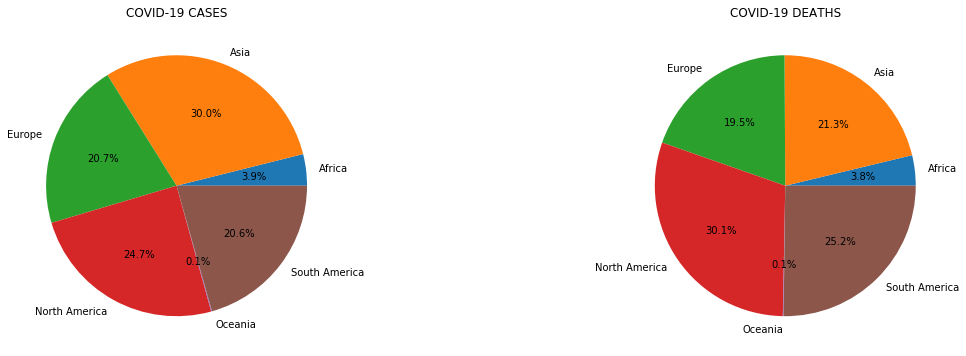

In [176]:
death = cont_death.groupby(['continent']).apply(lambda df:df.death.iloc[-1]).to_frame().reset_index()
death = death.rename(columns={0:'death'})
case = cont_case.groupby(['continent']).apply(lambda df:df.cases.iloc[-1]).to_frame().reset_index()
case = case.rename(columns={0:'cases'})
continent = pd.merge(left=case,right=death)

plt.figure(figsize=(20,6))
plt.subplot(1,2,1).set_title("COVID-19 CASES")

plt.pie(continent['cases'],labels=continent['continent'],autopct='%1.1f%%')

plt.subplot(1,2,2).set_title("COVID-19 DEATHS")
plt.pie(continent['death'],labels=continent['continent'],autopct='%1.1f%%')
plt.show()

### Continent - [ 'Asia' ]

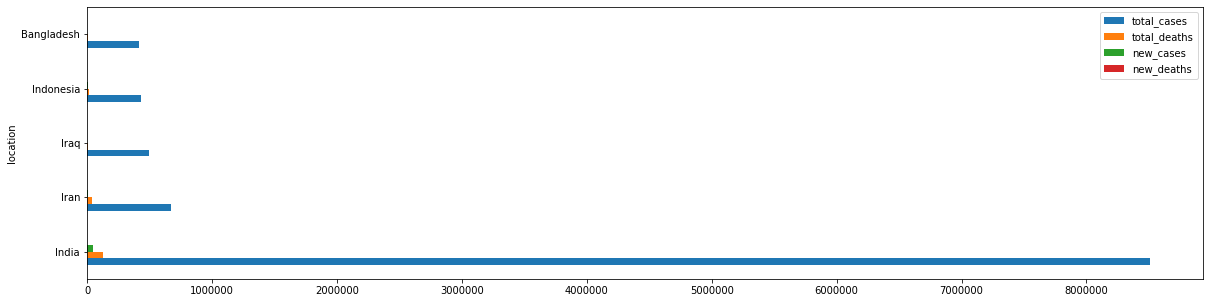

In [241]:
cont_data = dataset[dataset['continent']=='Asia'].groupby('location').tail(1).sort_values(by='total_cases',ascending=False)[['location','total_cases','total_deaths','new_cases','new_deaths']].head().set_index('location')
cont_data.plot.barh(figsize=(20,5))